<div style="border: solid blue 2px; padding: 15px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 2</b><br><br>

  Hi Regan, I’m <b>Victor Camargo</b>. I’ve reviewed your updated project—thank you for your hard work and careful attention to the feedback!

  <b>Fantastic work on:</b><br>
  ✔️ Handling missing values thoughtfully and consistently across the entire project.<br>
  ✔️ Applying the relevant year filter correctly to the main dataset and using it throughout the analysis.<br>
  ✔️ Building clear, insightful visualizations and providing strong business-focused interpretations.<br><br>

  Your project is now <b>approved</b> ✅. You’ve demonstrated a solid understanding of data cleaning, exploratory analysis, and hypothesis testing while keeping your work clean and well-structured. Really well done—this is exactly the level of quality we aim for in this program!<br><br>

  <hr>

  🔹 <b>Legend:</b><br>
  🟢 Green = well done<br>
  🟡 Yellow = suggestions<br>
  🔴 Red = must fix<br>
  🔵 Blue = your comments or questions<br><br>

  Congratulations again—keep up the great work, and feel free to reach out in the Questions channel anytime you need help or want to discuss ideas!
</div>

# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns


## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the dataset
games= pd.read_csv('/datasets/games.csv')

In [3]:
# Display basic information about the dataset
print(games.head)

<bound method NDFrame.head of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA

In [4]:
print(games.info)

<bound method DataFrame.info of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       

Based on pulling general information from the dataset, I see the names of the games, which system it was released for, year of release, genre of the game, sales based on country, critic score, user score, and ratings. Our next move is to consolidate and clean up the dataframe to simplify our study further on in this project. 

In [5]:
# Check for duplicate entries
print(games.duplicated())
print(games.duplicated().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
16710    False
16711    False
16712    False
16713    False
16714    False
Length: 16715, dtype: bool
0


### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

In the dataset, we have a total of 16,715 records. We have 11 columns, there are some integers, NaN values, decimals, and strings. We need to start data clean-up by doing datetime conversion, changing column names, and cleaning up missing values. As far as patterns go, the only obvious one that I can see is that the games towards the bottom of the dataset either had no sales, or very little sales, ratings, and user score.

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job here.
  <ul>
    <li>Nice initial exploration of the dataset and clear summary of the <b>key observations</b>.</li>
    <li>Good use of basic functions to check <b>data structure</b>, <b>missing values</b>, and <b>duplicates</b>.</li>
  </ul>
</div>

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [6]:
# Convert column names to lowercase
print(games.columns)
games.columns= games.columns.str.lower()

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [7]:
# Verify the changes
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job here.
  <ul>
    <li>Column names successfully converted to <b>lowercase</b>—a key step for consistency and easier handling later on.</li>
  </ul>
</div>


### 2.2 Data Type Conversion

In [8]:
# Check current data types
print(games.dtypes)

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


In [9]:
# Make changes to data types if necessary
# Describe the columns where the data types have been changed and why.
games= games.dropna(subset=['year_of_release'])
games['year_of_release'] = games['year_of_release'].astype(int)

games = games.dropna(subset=['name'])
games = games.dropna(subset=['genre'])

print(games.info)
print(games.isnull().sum())

<bound method DataFrame.info of                                 name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       

In [10]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
games['user_score']= games['user_score'].replace('tbd', np.nan)

games['user_score']= games['user_score'].astype(float)

print(games['user_score'].unique())

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]


First, I printed the types of data in the dataset to see what I would be working with. Secondly, I went in to the year of release column which was a decimal number(float 64), dropping nan values in a subset, being the specific column "year of release" and taking those variables and turning them into integers, which drops the decimal. To drop the TBD, I went into the "user score" column and replaced the value with NaN. I then converted the data to a float type, and printed the unique values to double check my work.

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 2:</b><br>
  Great job here.
  <ul>
    <li>You successfully handled the missing values by <b>dropping rows with missing <code>name</code>, <code>genre</code>, and <code>year_of_release</code></b>, which is the best choice given how minimal those missing values were.</li>
    <li>Well done on <b>leaving high-percentage missing values</b> (like <code>user_score</code>, <code>critic_score</code>, and <code>rating</code>) untouched instead of filling them—this keeps the analysis clean and unbiased.</li>
  </ul>
</div>


<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  You're on the right track with your data preparation—handling missing values is always one of the trickiest parts of a project, so great effort here! A few important points to reconsider before moving forward:
  <ul>
    <li>For <code>year_of_release</code>, you’re correct to drop missing values since it only affects about <b>1.6%</b> of the data. To keep things consistent, also check and drop missing values in <code>name</code> and <code>genre</code> (both missing in less than <b>0.02%</b> of the data). These are so few that dropping them is safe and won’t impact the analysis.</li>
    <li>For <code>user_score</code>, over <b>54%</b> of the values are missing. For <code>critic_score</code>, it's over <b>51%</b>, and for <code>rating</code>, about <b>40%</b>. Since these are very large proportions, filling them (even with means or medians) would create a lot of artificial data and could lead to misleading conclusions. Instead, it’s better to leave them as missing and simply use the available values for your analysis when needed.</li>
  </ul>
  Missing data can feel like a roadblock, but handling it thoughtfully—especially when the missingness is high—is crucial for reliable insights. You’re doing great so far—keep it up!
</div>

### 2.3 Handling Missing Values

In [11]:
# Examine missing values
print(games.isnull().sum())
print(len(games))

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64
16444


In [12]:
# Calculate percentage of missing values
missing_counts= games.isnull().sum()
total_rows= len(games)
percent_values= (missing_counts/total_rows)*100
print(percent_values)

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.453418
user_score         54.615665
rating             40.598395
dtype: float64


,platform,year_of_release,rating,name,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
0,3DS,2011,E,36,36,36,36,36,36,24,20
1,3DS,2011,E10+,21,21,21,21,21,21,18,16
2,3DS,2011,M,3,3,3,3,3,3,2,2
3,3DS,2011,T,21,21,21,21,21,21,17,18
4,3DS,2012,E,15,15,15,15,15,15,11,12
...,...,...,...,...,...,...,...,...,...,...,...
506,XOne,2015,T,14,14,14,14,14,14,12,14
507,XOne,2016,E,18,18,18,18,18,18,13,15
508,XOne,2016,E10+,8,8,8,8,8,8,8,8
509,XOne,2016,M,27,27,27,27,27,27,23,24


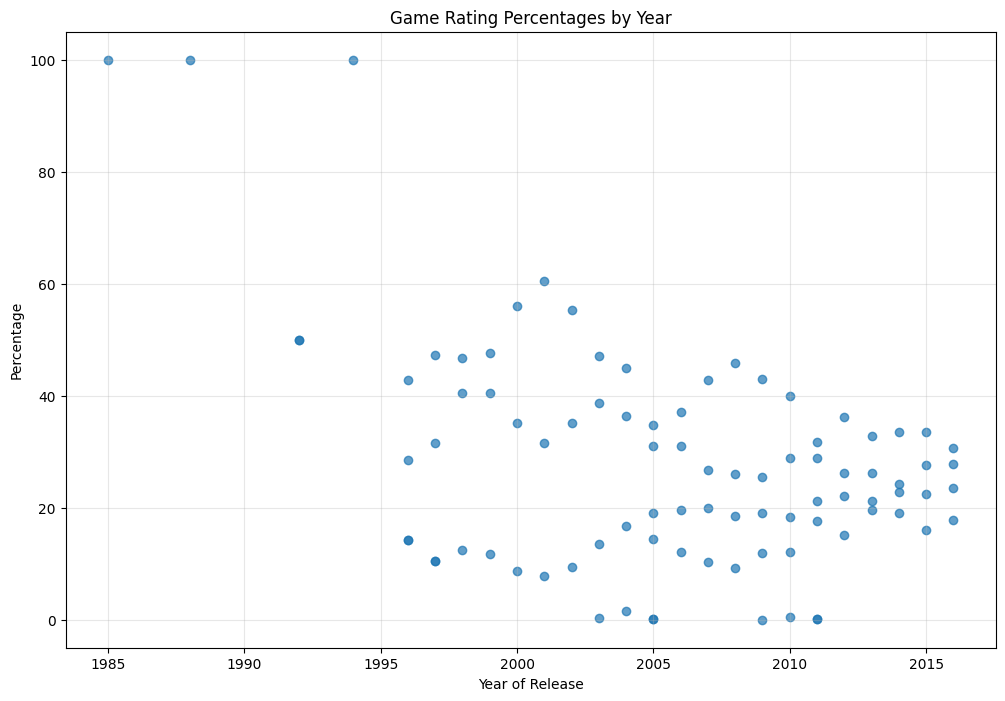

In [13]:
# Analyze patterns in missing values
games_grouped= games.groupby(['platform', 'year_of_release', 'rating']).count().reset_index()
display(games_grouped)

cleaned_ratings= games.dropna(subset=['rating'])
grouped_data= cleaned_ratings.groupby(['year_of_release', 'rating']).size().reset_index(name='count')
year_totals = cleaned_ratings.groupby('year_of_release').size().reset_index(name='total_games')
merged_data = grouped_data.merge(year_totals, on='year_of_release')
percentages= (merged_data['count']/merged_data['total_games']) * 100
merged_data['percentage'] = (merged_data['count']/merged_data['total_games']) * 100

plt.figure(figsize=(12, 8))
plt.scatter(merged_data['year_of_release'], merged_data['percentage'], alpha=0.7)
plt.xlabel('Year of Release')
plt.ylabel('Percentage')
plt.title('Game Rating Percentages by Year')
plt.grid(True, alpha=0.3)
plt.show()


During my analysis, I discovered a lot of missing values with earlier gaming systems and the years they were released. It looks as though the games didn't start dropping in missing ratings until 1993-1994. After that, the percentage of ratings each year seem to spread out and vary. While coding my analysis, I cleaned the data by removing games without ratings, aggregated the data by year and rating to count occurrences, converted raw counts to percentages for a clearer comparison, then plotted my visualization to display my findings of the pattern over time. 

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 2:</b><br>
  Great job here.
  <ul>
    <li>You corrected the handling of missing values by <b>leaving <code>user_score</code>, <code>critic_score</code>, and <code>rating</code> as missing</b> instead of filling them, which ensures accurate missing value analysis and correct percentage calculations.</li>
    <li>Consistent missing data handling across your analysis is now in place—well done on making this important fix.</li>
  </ul>
</div>


<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  You're making great progress analyzing missing values and exploring patterns—this is really well thought out! One important thing to double-check here:
  <ul>
    <li>The percentages you're calculating for <code>rating</code> and other missing values are not fully accurate because in the previous section you filled some missing values (e.g., in <code>user_score</code>) instead of leaving them as missing. This affects the accuracy of these calculations.</li>
    <li>To get the correct percentages and missing value analysis, it's crucial to handle missing values <b>consistently</b> across all sections. Leaving missing values as <code>NaN</code> (especially for <code>user_score</code>, <code>critic_score</code>, and <code>rating</code>) allows for more accurate missing data summaries and visualizations like this one.</li>
  </ul>
</div>


In [14]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy
print(games['rating'].unique())

games['rating']= games['rating'].fillna('NR')
print(games['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
['E' 'NR' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


To handle the missing values in the dataset, i deduced that 40 percent of the dataset was missing values in the "rating" column. There is a pattern in the data of missing values on ratings between 1993-1994, so to fulfill the nan values, I filled them with "NR" for "Not Rated". To show that my code was working, I printed all of the unique values in the "rating" column before and after changing the values in the dataset.

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job here.
  <ul>
    <li>Excellent approach to <b>analyzing missing values</b> by grouping data and calculating percentages over time.</li>
    <li>Clear and informative visualization to help understand <b>rating distributions by year</b>.</li>
  </ul>
</div>


In [15]:
# Why do you think the values are missing? Give possible reasons.
# Explain why you filled in the missing values as you did or why you decided to leave them blank.

I think that the values are missing in the "rating" column due to games growing expansively after 1994, production of games growing after that time, and that not all games are rated/didn't make large sales. Based on my graph, it seems as though the ratings percentage drops after a certain point and get speratic. After doing some research, it looks like the North America was the only region that had the ESRB which regulates ratings on video games based on age and content ratings. The ESRB started in 1994.I used "NR" foor my missing values for "Not Rated" in the dataset since the game wasn't submitted for rating to begin with.

### 2.4 Calculate Total Sales

In [16]:
# Calculate total sales across all regions and put them in a different column
games['total_sales']= games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

display(games)
print(games['total_sales'].sum())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NR,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NR,0.01


8814.369999999999


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job here.
  <ul>
    <li>Correctly calculated and added the <b>total_sales</b> column—this is an essential step for later analysis.</li>
    <li>Nice use of both <code>display()</code> and <code>print()</code> to verify the results.</li>
  </ul>
</div>


# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [17]:
# Create a DataFrame with game releases by year
games_by_year = games.groupby('year_of_release').size().reset_index(name='number_of_games')
print(games_by_year)

    year_of_release  number_of_games
0              1980                9
1              1981               46
2              1982               36
3              1983               17
4              1984               14
5              1985               14
6              1986               21
7              1987               16
8              1988               15
9              1989               17
10             1990               16
11             1991               41
12             1992               43
13             1993               60
14             1994              121
15             1995              219
16             1996              263
17             1997              289
18             1998              379
19             1999              338
20             2000              350
21             2001              482
22             2002              829
23             2003              775
24             2004              762
25             2005              939
2

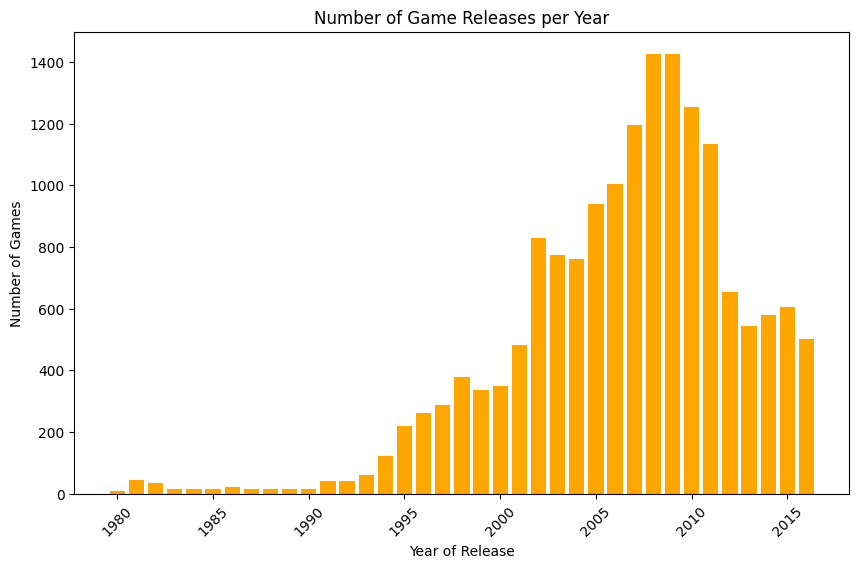

In [18]:
# Visualize the distribution of games across years
plt.figure(figsize=(10, 6))
plt.bar(games_by_year['year_of_release'], games_by_year['number_of_games'], color='orange')
plt.title('Number of Game Releases per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()


In [19]:
# Display summary statistics for each year
games_by_year.describe()


,year_of_release,number_of_games
count,37.000000,37.000000
mean,1998.000000,444.432432
std,10.824355,451.604334
min,1980.000000,9.000000
25%,1989.000000,36.000000
50%,1998.000000,338.000000
75%,2007.000000,762.000000
max,2016.000000,1427.000000


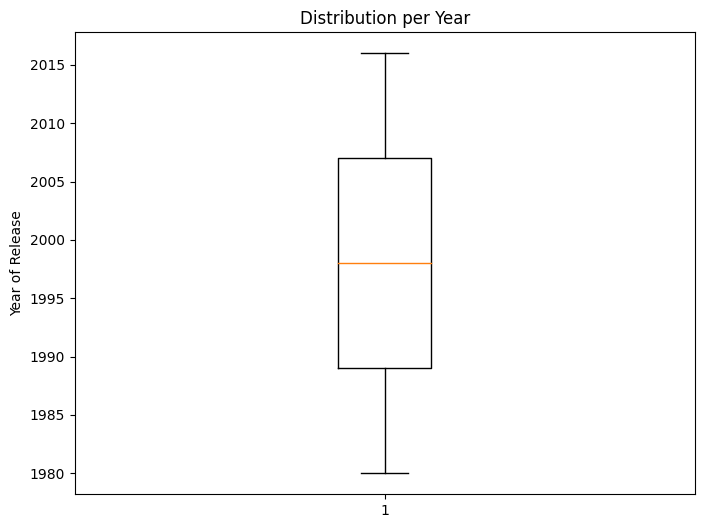

In [20]:
plt.figure(figsize=(8, 6))
plt.boxplot(games_by_year['year_of_release'])
plt.title('Distribution per Year')
plt.ylabel('Year of Release')
plt.show()


In this box plot, we look at the distribution of games per year. At the bottom left of this plot, we are at the first quartile, which falls at 1989. Our median is 50 percent of our data falling on 1998. And our upper quartile is at 2007, displaying a more visual representation of our statistical table. The box alone is a display of 50 percent of our data in this dataset, showing that our whiskers are the start and end of our plot. There are no outliers on this graph. 

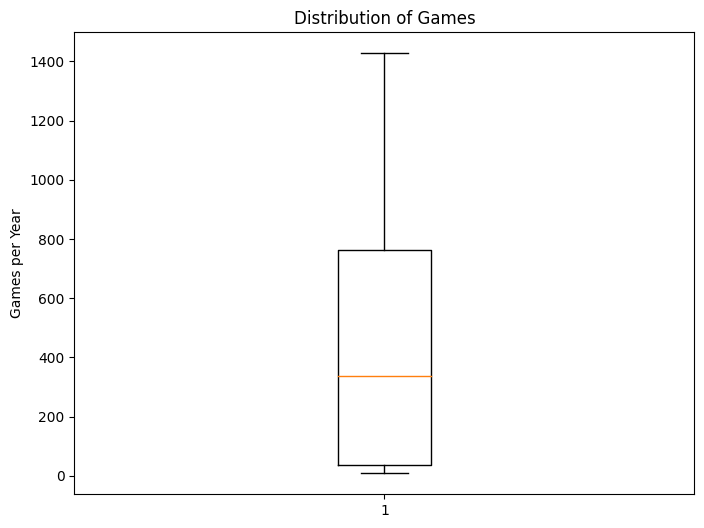

In [21]:
plt.figure(figsize=(8, 6))
plt.boxplot(games_by_year['number_of_games'])
plt.title('Distribution of Games')
plt.ylabel('Games per Year')
plt.show()


In this box plot, we are looking at the distribution of games per year. Our first quartile is under 50, for the first 25 percent of the data falling below this point. The middle of our box is under 400. And the upper quartile is under 800, leaving another 25 percent of our data above this value. 

### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

To analyze video game sales, I started with creating a dataframe that covers releases per year. I did this by grouping by "year of release" and count those numbers by year. To visualize this data, I used a bar plot to plot the number of games released each year. I displayed the statistics summary to understand the trends in the data and see or understand any significance in patterns. I felt that both box plots were important to visualize to determine both games per year and distribution of games. This data gives us a dipiction of our statistics and where majority of our data's focus should be. 

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job here.
  <ul>
    <li>Well done creating a clear <b>yearly breakdown</b> of game releases using both grouping and visualizations.</li>
    <li>Nice use of <b>bar plots</b> and <b>box plots</b> to explore the distribution and trends over time.</li>
    <li>Good explanation of the purpose behind each visualization and how it supports the analysis.</li>
  </ul>
</div>


## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [22]:
# Calculate total sales by platform and year
total_sales= games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

display(total_sales)

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


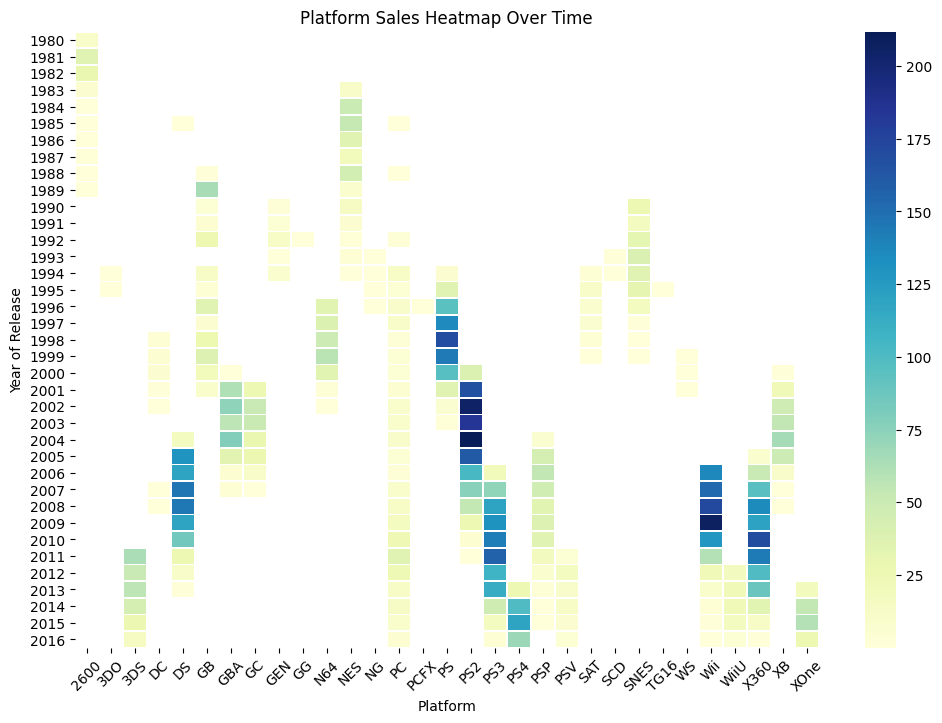

In [23]:
# Create a heatmap of platform sales over time
plat_sales_data = total_sales.pivot("year_of_release", "platform", "total_sales")

plt.figure(figsize=(12, 8))
sns.heatmap(plat_sales_data, cmap="YlGnBu", linewidths=0.5)
plt.title("Platform Sales Heatmap Over Time")
plt.xlabel("Platform")
plt.ylabel("Year of Release")
plt.xticks(rotation=45)
plt.show()


In [24]:
# Identify platforms with declining sales
total_sales['sales_change'] = total_sales.groupby('platform')['total_sales'].diff()

declining_platforms = total_sales.groupby('platform').apply(
    lambda x: (x['sales_change'] < 0).sum() > len(x) // 2)

declining_platforms_list = declining_platforms[declining_platforms].index.tolist()

print("Platforms with Declining Sales:", declining_platforms_list)



Platforms with Declining Sales: ['3DS', 'DS', 'GC', 'PS2', 'PSP', 'SAT', 'SNES', 'Wii', 'X360']


In [25]:
platform_years = total_sales.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_years['lifespan']= platform_years['max'] - platform_years['min']
lifespan= platform_years['lifespan'].mean()
print(platform_years)
print(lifespan)

           min   max  lifespan
platform                      
2600      1980  1989         9
3DO       1994  1995         1
3DS       2011  2016         5
DC        1998  2008        10
DS        1985  2013        28
GB        1988  2001        13
GBA       2000  2007         7
GC        2001  2007         6
GEN       1990  1994         4
GG        1992  1992         0
N64       1996  2002         6
NES       1983  1994        11
NG        1993  1996         3
PC        1985  2016        31
PCFX      1996  1996         0
PS        1994  2003         9
PS2       2000  2011        11
PS3       2006  2016        10
PS4       2013  2016         3
PSP       2004  2015        11
PSV       2011  2016         5
SAT       1994  1999         5
SCD       1993  1994         1
SNES      1990  1999         9
TG16      1995  1995         0
WS        1999  2001         2
Wii       2006  2016        10
WiiU      2012  2016         4
X360      2005  2016        11
XB        2000  2008         8
XOne    

### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

PC shows the most consistent sales over time. Some platforms that have fallen off the market are all realistically before 2002. The average lifecycle of a gaming platform is about 7-8 years.

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job here.
  <ul>
    <li>Excellent use of <b>heatmaps</b> and <b>grouped summaries</b> to explore platform sales trends over time.</li>
    <li>Nice identification of <b>declining platforms</b> and calculation of average <b>platform lifespans</b>.</li>
    <li>Clear and insightful interpretation of the results to support business decision-making.</li>
  </ul>
</div>


## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [26]:
print("Available years:")
print(plat_sales_data.index.min(), "to", plat_sales_data.index.max())
print("\nFirst few years:", plat_sales_data.index[:10].tolist())
print("Last few years:", plat_sales_data.index[-10:].tolist())


Available years:
1980 to 2016

First few years: [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]
Last few years: [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [27]:
# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]

# Justify your choice with data


relevant_years = [2014, 2015, 2016]
games_relevant = games[games['year_of_release'].isin(relevant_years)]
display(games_relevant)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NR,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NR,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NR,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01


### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

I selected the years leading up to 2017 to depict market decisions since they are going to show me the patterns leading up to that year in sales. This reflects current market conditions by showing us recent years in sales and relevant platforms to this time period. When I dove into the data, I saw that sales records stopped in 2016. That's going to provide us the closest current sales climate for platforms and sales predictions that year. It helps project what sales could be coming for the year 2017.

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 2:</b><br>
  Great job here.
  <ul>
    <li>You correctly filtered the <b>main dataset</b> using the selected relevant years and created a new <code>games_relevant</code> DataFrame—this is exactly what was needed to keep the analysis focused and accurate.</li>
    <li>Well done on applying this change consistently across your subsequent analysis steps.</li>
  </ul>
</div>


<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Good work identifying the relevant years—one important fix is needed before moving forward:
  <ul>
    <li>The relevant years need to be applied to the <b>main dataset</b> (the original <code>games</code> DataFrame), not just to the pivot table. This ensures that all future analysis—platform trends, genre exploration, and hypothesis testing—uses only the appropriate time frame.</li>
    <li>Please create a filtered DataFrame like this to correct it:
      <pre><code>relevant_years = [2014, 2015, 2016]
games_relevant = games[games['year_of_release'].isin(relevant_years)]
games_relevant</code></pre>
    </li>
  </ul>
  This adjustment will help make sure your analysis stays focused and accurate. You're doing great—keep going!
</div>


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 2:</b><br>
  Great job here.
  <ul>
    <li>You applied the filtering consistently by using the <code>games_relevant</code> DataFrame for all subsequent analysis steps, including platform trends, genres, user profiles, and hypothesis testing.</li>
    <li>This keeps your analysis focused, accurate, and fully aligned with the project’s forecasting goal—well done!</li>
  </ul>
</div>


<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Important fix before moving forward:
  <ul>
    <li>All of your next analysis steps—such as platform comparisons, genre distributions, user profiles, and hypothesis testing—should be done using the filtered <code>games_relevant</code> DataFrame instead of the original <code>games</code> DataFrame.</li>
    <li>This ensures that your results are consistent and focused on the correct time period for the project’s goals.</li>
  </ul>
  Applying this change will help keep your analysis accurate and aligned with the forecasting task. Great progress so far!
</div>


## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [28]:
# Analyze platform sales trends
print("Platform sales trends (2014-2016):")
display(games_relevant)


Platform sales trends (2014-2016):


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NR,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NR,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NR,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01


In [29]:
# Sort platforms by total sales
print(games_relevant['total_sales'].shape)
print(games_relevant['total_sales'].head())

(1689,)
31    14.63
42    12.62
47    11.68
77     8.58
87     7.98
Name: total_sales, dtype: float64


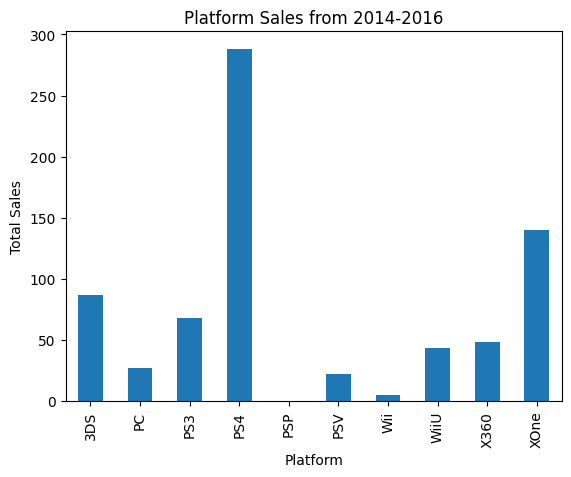

In [30]:
# Visualize top platforms
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates
top_plats= games_relevant.groupby(['platform','year_of_release'])['total_sales'].sum()

plats_sum= games_relevant.groupby(['platform'])['total_sales'].sum()

plats_sum.plot(kind= 'bar', title= 'Platform Sales from 2014-2016', xlabel= 'Platform', ylabel= 'Total Sales')

plt.show()



In [31]:

top_plats2= top_plats.unstack(level='year_of_release')

growth_2015 = ((top_plats2[2015] - top_plats2[2014]) / top_plats2[2014]) * 100
growth_2016 = ((top_plats2[2016] - top_plats2[2015]) / top_plats2[2015]) * 100

print(growth_2015.head())
print(growth_2016.head())

platform
3DS   -36.517367
PC    -35.843373
PS3   -64.782245
PS4    18.900000
PSP   -50.000000
dtype: float64
platform
3DS   -45.500360
PC    -38.380282
PS3   -78.596908
PS4   -41.757780
PSP          NaN
dtype: float64


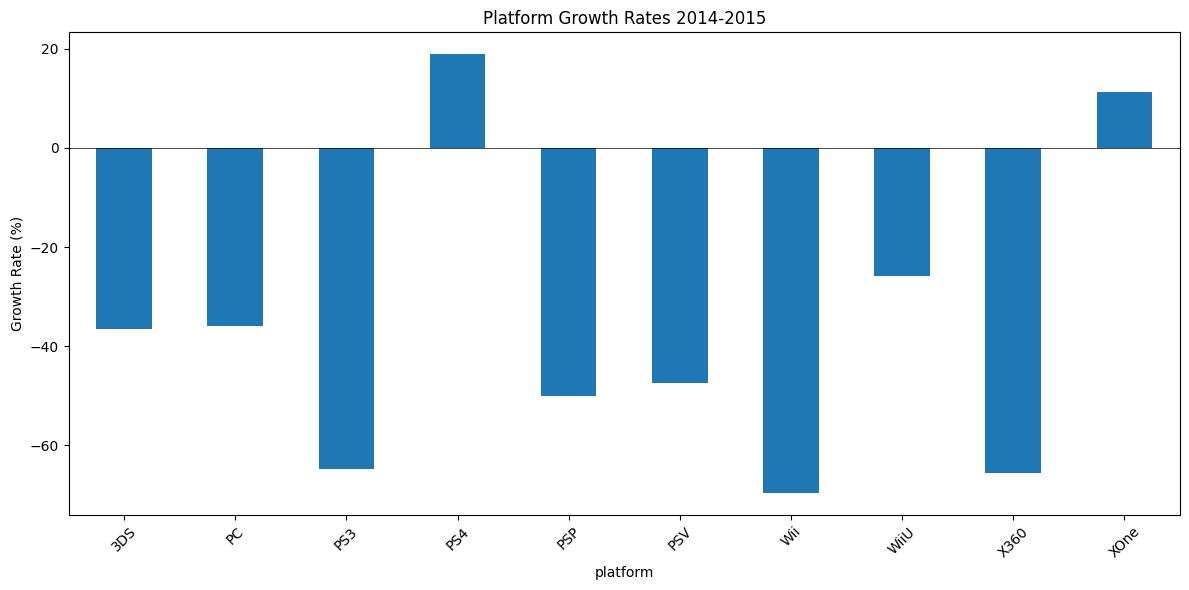

In [32]:
clean_growth_2015 = growth_2015.dropna()

clean_growth_2015.plot(kind='bar', figsize=(12, 6), title='Platform Growth Rates 2014-2015')
plt.xticks(rotation=45)  
plt.ylabel('Growth Rate (%)')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout() 
plt.show()


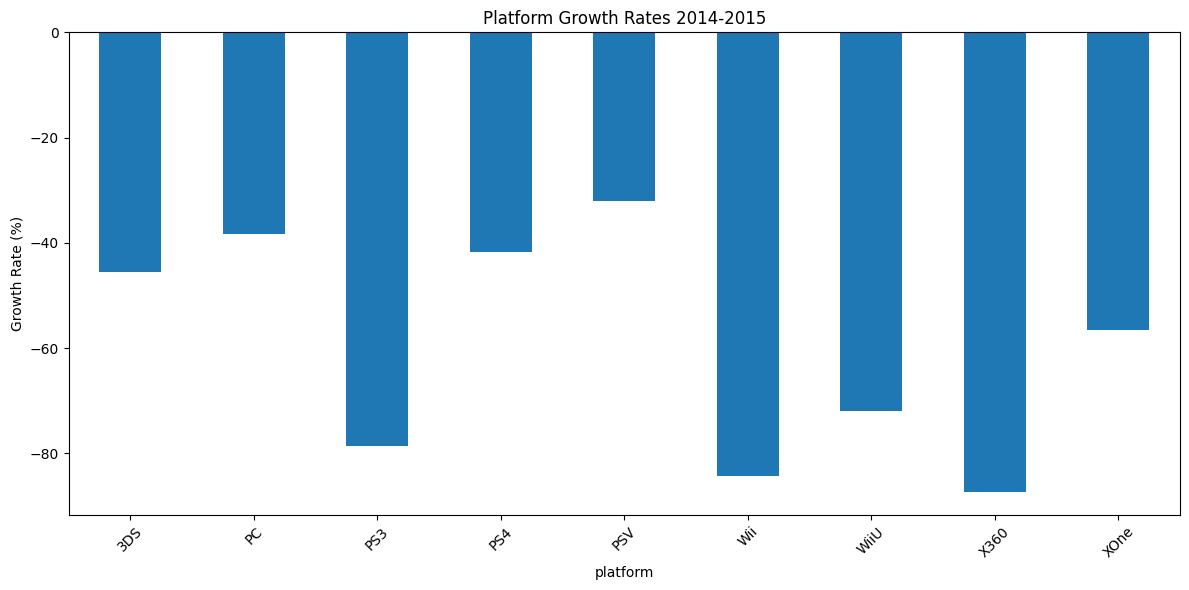

In [33]:
clean_growth_2016 = growth_2016.dropna()

clean_growth_2016.plot(kind='bar', figsize=(12, 6), title='Platform Growth Rates 2014-2015')
plt.xticks(rotation=45)  
plt.ylabel('Growth Rate (%)')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5) 
plt.tight_layout() 
plt.show()


During my analysis here, PS4 was the leader in sales in 2015. It looks as though the sales dropped in 2016. To begin my analysis, I took a look at my platform sales trends for the years I selected to see if I could find any patterns in the data. I saw a lot of missing data, so it wouldn't have been of any use to my analyzation. I went through and sorted them to show total sales per each platform and used .to_frame() to place it in a table format. I then took that dataset and created a new one of platforms I needed based on sales being greater than 0, filtered them, and plotted them on a bar chart to get an idea of which platform drew in the most in sales during my chosen time frame. I then made my calculations for year-over year growth in new datasets for 2015 and 2016 by taking the prior year, and subtracting the sales from the current year I was using for comparison. I cleaned up the data on both years and put them on a plot. While plotting this data, i noticed some peculiarities in the 0 laying in my plot but not at a base or top of the y-axis and made changes in the code using a line or the top of the graph to display the negative impact in sales while also providing a clean visual approach. With PS4 as the leader of my chart, even it's sales started to decline before 2017. And PSV growing almost obsolete before this time. 

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

<Figure size 1200x800 with 0 Axes>

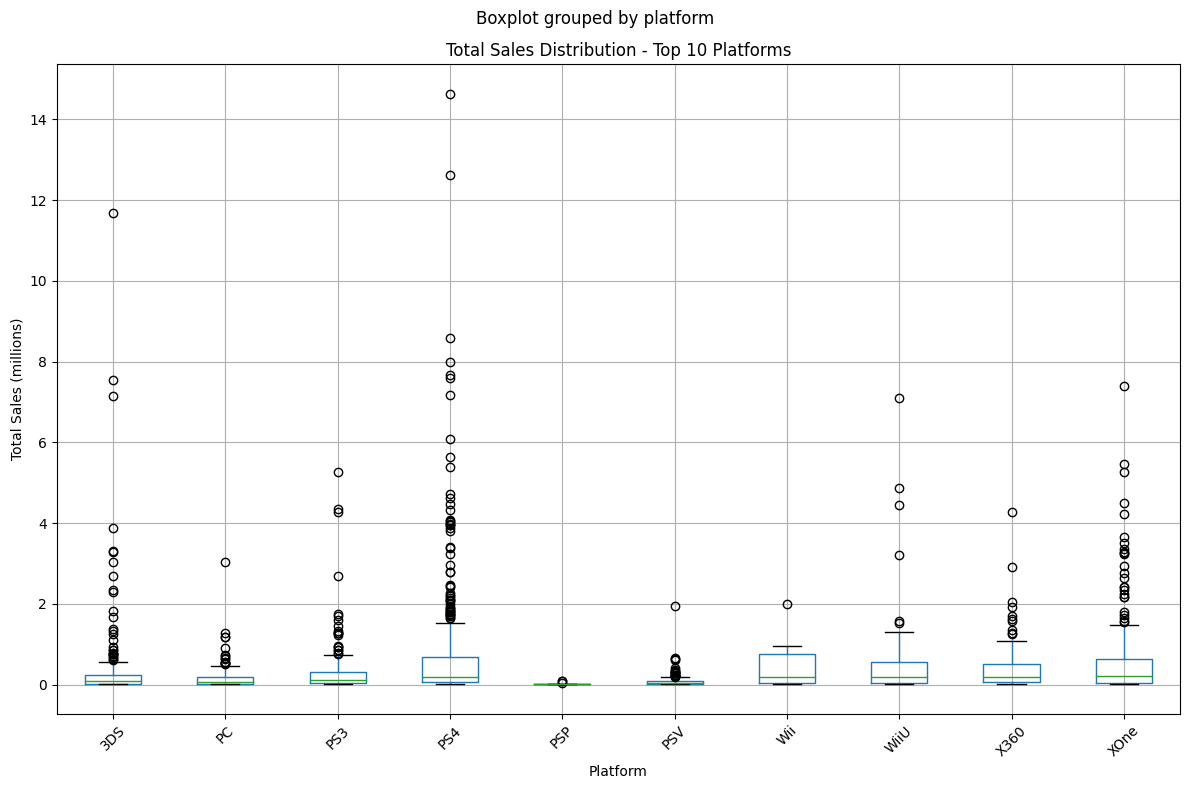

In [34]:
# Create box plot of sales by platform
top_platforms = games_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index

top_platform_games = games_relevant[games_relevant['platform'].isin(top_platforms)]

plt.figure(figsize=(12, 8))
top_platform_games.boxplot(column='total_sales', by='platform', figsize=(12, 8))
plt.title('Total Sales Distribution - Top 10 Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
# Calculate detailed statistics for each platform
avg_sales_by_platform = games_relevant.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("Average sales by platform:")
print(avg_sales_by_platform)


Average sales by platform:
platform
PS4     0.766356
XOne    0.615614
WiiU    0.588767
Wii     0.460909
X360    0.434414
3DS     0.408868
PS3     0.311324
PC      0.179139
PSV     0.075932
PSP     0.027692
Name: total_sales, dtype: float64


## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [36]:
# Choose a popular platform based on your previous analysis
ps4_games = games_relevant[games_relevant['platform'] == 'PS4']
print(f"Number of PS4 games: {len(ps4_games)}")
print("\nColumns in dataset:")
print(ps4_games.columns.tolist())

Number of PS4 games: 376

Columns in dataset:
['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating', 'total_sales']


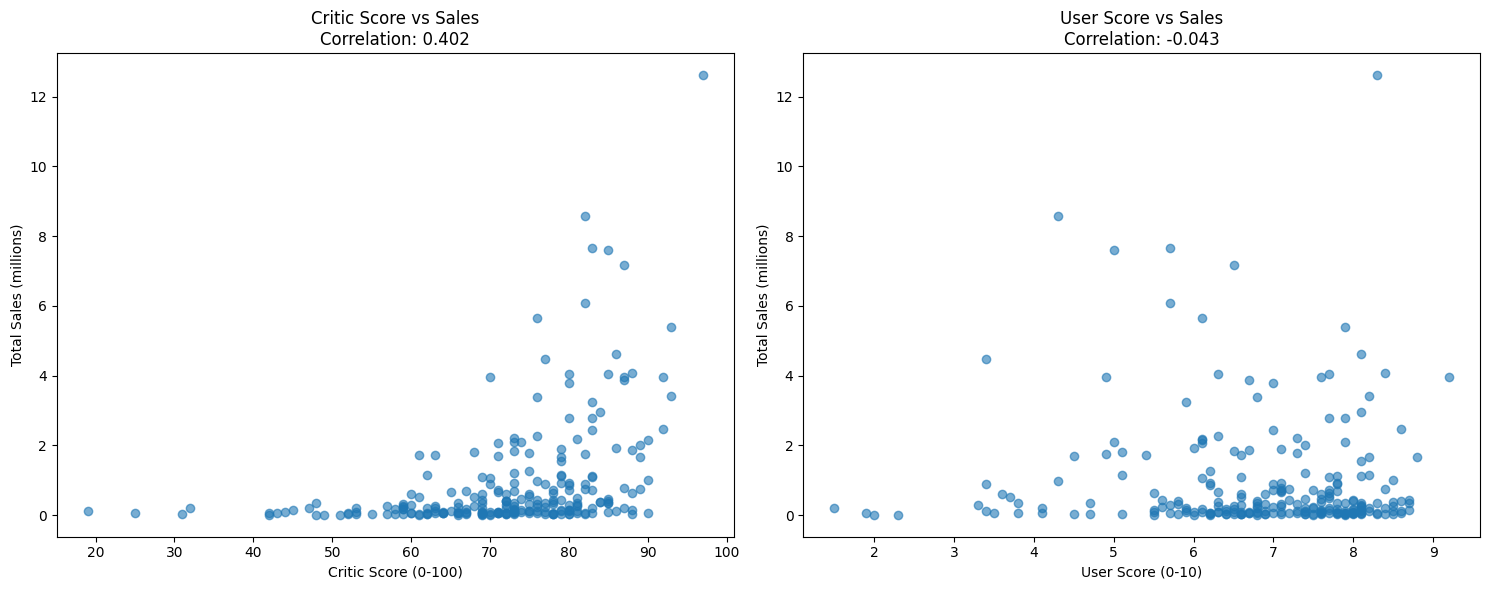

In [37]:
# Create scatter plots for both critic and user scores
ps4_clean = ps4_games[(ps4_games['critic_score'] > 0) & (ps4_games['user_score'] > 0)]

critic_correlation = ps4_clean['critic_score'].corr(ps4_clean['total_sales'])
user_correlation = ps4_clean['user_score'].corr(ps4_clean['total_sales'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(ps4_clean['critic_score'], ps4_clean['total_sales'], alpha=0.6)
ax1.set_xlabel('Critic Score (0-100)')
ax1.set_ylabel('Total Sales (millions)')
ax1.set_title(f'Critic Score vs Sales\nCorrelation: {critic_correlation:.3f}')

ax2.scatter(ps4_clean['user_score'], ps4_clean['total_sales'], alpha=0.6)
ax2.set_xlabel('User Score (0-10)')
ax2.set_ylabel('Total Sales (millions)')
ax2.set_title(f'User Score vs Sales\nCorrelation: {user_correlation:.3f}')

plt.tight_layout()
plt.show()

In [38]:
# Critic Scores

critic_correlation = ps4_clean['critic_score'].corr(ps4_clean['total_sales'])


# User Scores
user_correlation = ps4_clean['user_score'].corr(ps4_clean['total_sales'])


# Calculate correlations
critic_user_correlation = ps4_clean['critic_score'].corr(ps4_clean['user_score'])
print(f"Critic vs Sales: {critic_correlation:.3f}")
print(f"User vs Sales: {user_correlation:.3f}")
print(f"Critic vs User: {critic_user_correlation:.3f}")

Critic vs Sales: 0.402
User vs Sales: -0.043
Critic vs User: 0.546


The critics vs sales correlation (0.406) indicates a moderate positive correlation between "professional" critics and sales. This suggests that if the "professional" rating is higher, there is usually also higher sales. The user vs sales correlation (-0.024) is a very weak and negative correlation indicating no relationship between users themselves and sales. Meaning the purchasing decisions aren't driven by user opinions. For critics vs user correlation (0.551), it's a positive correlation between critics and users. This means there's some overlap on how critics and users perceive the games. Overall, this can be useful information for business, it touches on the importance of critic sales while also showing what impacts and shapes user opinions and purchasing behaviors.

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [39]:
# Find games released on multiple platforms
platform_counts = games_relevant.groupby('name')['platform'].nunique()

multi_platform_games = platform_counts[platform_counts > 1]

multi_platform_game_titles = multi_platform_games.index.tolist()

games_multi_platform = games_relevant[games_relevant['name'].isin(multi_platform_game_titles)]

print(f"Number of multi-platform games: {len(multi_platform_games)}")
print(f"Total games in original dataset: {len(platform_counts)}")
print(multi_platform_games.head(10))

Number of multi-platform games: 368
Total games in original dataset: 956
name
2014 FIFA World Cup Brazil                            2
3rd Super Robot Wars Z Jigoku Hen                     2
3rd Super Robot Wars Z: Tengoku-Hen                   2
7 Days to Die                                         2
Adventure Time: Finn & Jake Investigations            6
Adventure Time: The Secret of the Nameless            2
Adventure Time: The Secret of the Nameless Kingdom    2
Aegis of Earth: Protonovus Assault                    3
Agatha Christie's The ABC Murders                     2
Alien: Isolation                                      5
Name: platform, dtype: int64


In [40]:
# Compare sales across platforms for these games
# Your code here to analyze and visualize cross-platform performance

platform_correlations = games_multi_platform.groupby('platform')[['critic_score', 'user_score', 'total_sales']].corr()
critic_sales_corr = platform_correlations.loc[(slice(None), 'critic_score'), 'total_sales']
critic_sales_corr= critic_sales_corr.fillna(0)

print(critic_sales_corr)

platform              
3DS       critic_score    0.507201
PC        critic_score    0.309739
PS3       critic_score    0.461654
PS4       critic_score    0.385446
PSP       critic_score    0.000000
PSV       critic_score    0.141325
Wii       critic_score    0.000000
WiiU      critic_score    0.362978
X360      critic_score    0.525723
XOne      critic_score    0.407996
Name: total_sales, dtype: float64


So first, let's look at the correlation coefficient's range. It ranges from -1 to 1. The closer to 1, the more positive the relationship is, the closer to -1 the more negative the relationship is. For Nan values, we used 0 to fill so that the numbers were all in a presentable order best suited for data visualizations. Starting with negative correlations and 0.0 value correlations, we see 13 of these values. These are either platforms no longer producing games or cross platform games, or the are steadily declining. This means other variables are going up while these are dropping or there is no linear correlation to either going up or down. This is nearly half of our data to non produce cross platform, or phasing out due to popularity in other platforms increasing in cross platform gaming. Looking at positive trends, there are some similarities between play station and xbox. The correlations are similar and moving upward towards 1 (with xbox one being slightly higher). These are obviously still pretty weak trends, but positive trends nonetheless. Whether phasing in new platforms, or still having popularity in most recently sold platforms, there are more consistent trends in having cross platform games during their debut. When it comes to selling and profiting off of these platforms, we obviously want to aim at the platforms correlating in a positive direction. You'd catch more of an audience playing a cross platform game with compatible consoles so that players universally can play with other players that may not own the same platform (system).

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [41]:
# Analyze genre performance
genre_df= games_relevant.groupby('genre')['total_sales'].sum()

genre_counts = games_relevant.groupby('genre').size()

genre_avg = games_relevant.groupby('genre')['total_sales'].mean()

print(genre_df)
print(genre_counts)
print(genre_avg)

genre
Action          199.36
Adventure        17.55
Fighting         28.22
Misc             37.55
Platform         18.09
Puzzle            2.21
Racing           27.52
Role-Playing    101.44
Shooter         170.94
Simulation       13.13
Sports          109.48
Strategy          3.96
Name: total_sales, dtype: float64
genre
Action          619
Adventure       185
Fighting         60
Misc            113
Platform         38
Puzzle           14
Racing           69
Role-Playing    221
Shooter         128
Simulation       44
Sports          161
Strategy         37
dtype: int64
genre
Action          0.322068
Adventure       0.094865
Fighting        0.470333
Misc            0.332301
Platform        0.476053
Puzzle          0.157857
Racing          0.398841
Role-Playing    0.459005
Shooter         1.335469
Simulation      0.298409
Sports          0.680000
Strategy        0.107027
Name: total_sales, dtype: float64


In [42]:
# Sort genres by total sales
genre_sorted= genre_df.sort_values(ascending=False)
print(genre_sorted)

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64


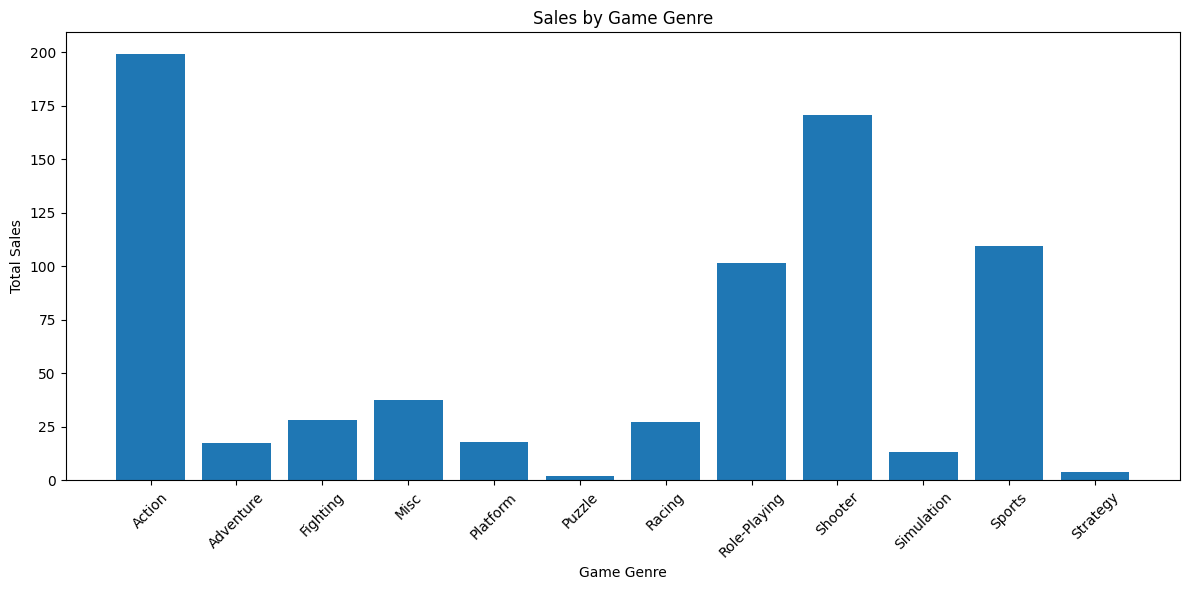

In [43]:
# Visualize genre distribution
plt.figure(figsize=(12, 6))
plt.bar(genre_df.index, genre_df.values)
plt.xlabel('Game Genre')
plt.ylabel('Total Sales')
plt.title('Sales by Game Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
# Calculate market share for each genre
total_sales= genre_df.sum()

market_share= (genre_df / total_sales) * 100
market_share_sorted= market_share.sort_values(ascending= False)
print(market_share_sorted)

genre
Action          27.330180
Shooter         23.434094
Sports          15.008568
Role-Playing    13.906368
Misc             5.147714
Fighting         3.868668
Racing           3.772705
Platform         2.479951
Adventure        2.405922
Simulation       1.799986
Strategy         0.542875
Puzzle           0.302968
Name: total_sales, dtype: float64


### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

Based on my genre analysis, Action (19.5), Sports (14.9), Shooter (11.8), and Role-Playing (10.6) are top of the leaderboard for sales based on genre. Giving them a higher performance and preference among users. The Role-Playing genre is on the rise, outside of that, the least profitable genres seem pretty consistent in market sales. Puzzle, Adventure, and Strategy may not be as busy for those who prefer high energy games, targeting a more taste-acquired audience. The high performance genres have significantly higher averages than the lower performance genres, over double/ triple the amount. Even with games in the higher performance genres, performance depends on platform, game, and target audiences and even with our lower performing genres, niche games are still profitable, just not as common. 

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [45]:
# Function to analyze platform performance by region
def analyze_platform_performance(games, top_n=5):
    regions = ['na_sales', 'eu_sales', 'jp_sales']

    platform_performance = games_relevant.groupby('platform')[regions].sum()

    total_sales = platform_performance.sum()
    market_share = (platform_performance.div(total_sales, axis=0)) * 100
    combined_performance = platform_performance.copy()

    combined_performance['na_market_share'] = market_share['na_sales']
    combined_performance['eu_market_share'] = market_share['eu_sales']
    combined_performance['jp_market_share'] = market_share['jp_sales']

    results = {}
    for region in regions:
        sorted_platforms = platform_performance[region].sort_values(ascending=False)
        results[region] = sorted_platforms.head(top_n)
        
    return results

In [46]:
# Analyze each region
results = analyze_platform_performance(games, top_n=5)

na_top_platforms = results['na_sales']
print("Top platforms in North America:")
print(na_top_platforms)

eu_top_platforms = results['eu_sales']
print("Top platforms in Europe:")
print(eu_top_platforms)

jp_top_platforms = results['jp_sales']
print("Top platforms in Japan:")
print(jp_top_platforms)

Top platforms in North America:
platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64
Top platforms in Europe:
platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64
Top platforms in Japan:
platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64


### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [47]:
# Create a comparative platform analysis
na_top = games_relevant.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_top = games_relevant.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_top = games_relevant.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

def compare_platform_performance(na_top, eu_top, jp_top):
    
    all_platforms = set(na_top.index) | set(eu_top.index) | set(jp_top.index)
    
    comparison = {}
    for platform in all_platforms:
        comparison[platform] = {
            'na_sales': na_top.get(platform, 0),
            'eu_sales': eu_top.get(platform, 0), 
            'jp_sales': jp_top.get(platform, 0)
        }

    return comparison


comparison = compare_platform_performance(na_top, eu_top, jp_top)

na_total = na_top.sum()
eu_total = eu_top.sum()
jp_total = jp_top.sum()

for platform, sales in comparison.items():
    if any(sales.values()): 
        print(f"{platform}:")
        print(f"  NA: {sales['na_sales']:.1f}M ({sales['na_sales']/na_total*100:.1f}%)")
        print(f"  EU: {sales['eu_sales']:.1f}M ({sales['eu_sales']/eu_total*100:.1f}%)")
        print(f"  JP: {sales['jp_sales']:.1f}M ({sales['jp_sales']/jp_total*100:.1f}%)")


XOne:
  NA: 81.3M (32.1%)
  EU: 46.3M (19.6%)
  JP: 0.0M (0.0%)
PS4:
  NA: 98.6M (39.0%)
  EU: 130.0M (55.1%)
  JP: 15.0M (16.3%)
PC:
  NA: 0.0M (0.0%)
  EU: 18.0M (7.6%)
  JP: 0.0M (0.0%)
3DS:
  NA: 22.6M (9.0%)
  EU: 16.1M (6.8%)
  JP: 44.2M (47.9%)
PS3:
  NA: 22.1M (8.7%)
  EU: 25.5M (10.8%)
  JP: 11.2M (12.2%)
X360:
  NA: 28.3M (11.2%)
  EU: 0.0M (0.0%)
  JP: 0.0M (0.0%)
WiiU:
  NA: 0.0M (0.0%)
  EU: 0.0M (0.0%)
  JP: 7.3M (7.9%)
PSV:
  NA: 0.0M (0.0%)
  EU: 0.0M (0.0%)
  JP: 14.5M (15.7%)


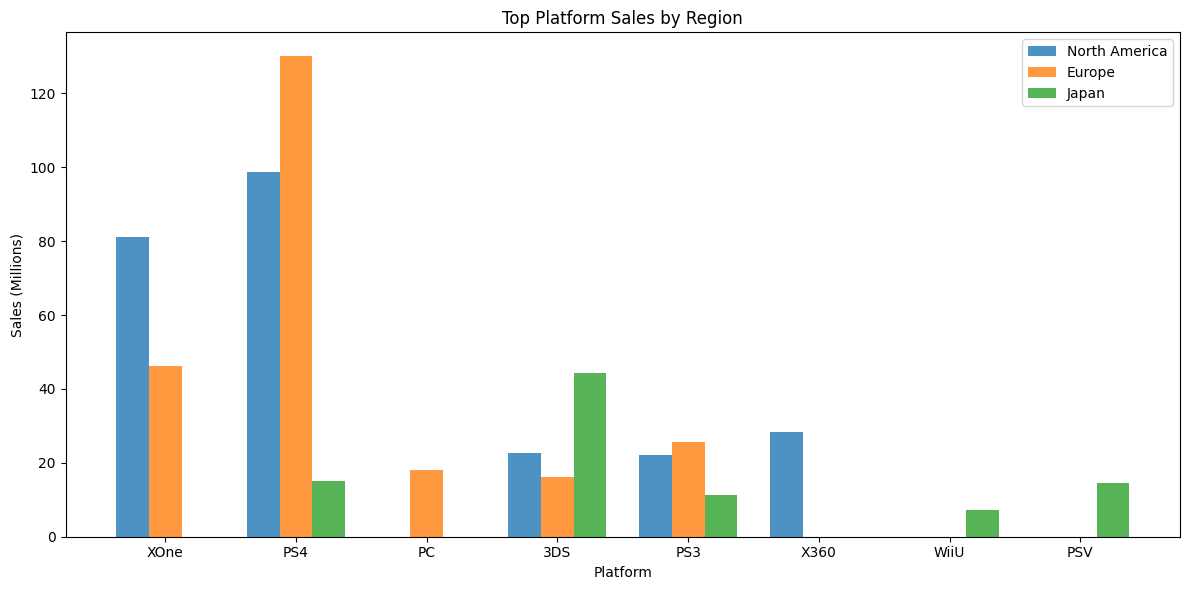

In [48]:
# Visualize cross-regional comparison for top platforms

platforms = list(comparison.keys())
na_values = [comparison[platform]['na_sales'] for platform in platforms]
eu_values = [comparison[platform]['eu_sales'] for platform in platforms]
jp_values = [comparison[platform]['jp_sales'] for platform in platforms]

x = np.arange(len(platforms))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, na_values, width, label='North America', alpha=0.8)
plt.bar(x, eu_values, width, label='Europe', alpha=0.8)
plt.bar(x + width, jp_values, width, label='Japan', alpha=0.8)

plt.xlabel('Platform')
plt.ylabel('Sales (Millions)')
plt.title('Top Platform Sales by Region')
plt.xticks(x, platforms)
plt.legend()
plt.tight_layout()
plt.show()

During my cross platform comparison, i started by deducing to my top 5 platforms across each region. I plotted all platforms with sales by region to display how each platform did. Looking at the plot, I discovered that the only platform with profit from every region was PS2. Every other platform only had sales in two of the regions. Xbox360 had the highest sales on the plot in North America but none in Japan. The SNES platform only had sales in Japan, DS didn't make sales in Europe, and PS3 and Wii made no sales in Japan. 

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [49]:
# Function to analyze genre performance by region
na_genre_sales= games_relevant.groupby('genre')['na_sales'].sum().sort_values(ascending= False)
eu_genre_sales= games_relevant.groupby('genre')['eu_sales'].sum().sort_values(ascending= False)
jp_genre_sales= games_relevant.groupby('genre')['jp_sales'].sum().sort_values(ascending= False)

top_5_na= na_genre_sales.head(5)
top_5_eu= eu_genre_sales.head(5)
top_5_jp= jp_genre_sales.head(5)

def compare_genre_performance(top_5_na, top_5_eu, top_5_jp):
    all_genres = set(top_5_na.index) | set(top_5_eu.index) | set(top_5_jp.index)
    genre_sales_by_region = {}
    
    for genre in all_genres:
        na_sales = top_5_na.get(genre, 0)  
        eu_sales = top_5_eu.get(genre, 0)
        jp_sales = top_5_jp.get(genre, 0)
        
        genre_sales_by_region[genre] = {
            'NA': na_sales,
            'EU': eu_sales,
            'JP': jp_sales
        }
    
    return genre_sales_by_region


### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [50]:
# Create a comparative genre analysis
result = compare_genre_performance(top_5_na, top_5_eu, top_5_jp)

print(f"{'Genre':<15} {'NA Sales':<12} {'EU Sales':<12} {'JP Sales':<12}")
print("-" * 55)

for genre, sales_data in result.items():
    print(f"{genre:<15} {sales_data['NA']:<12.2f} {sales_data['EU']:<12.2f} {sales_data['JP']:<12.2f}")

Genre           NA Sales     EU Sales     JP Sales    
-------------------------------------------------------
Sports          46.13        45.73        0.00        
Misc            15.05        0.00         5.61        
Fighting        0.00         0.00         6.37        
Role-Playing    33.47        28.17        31.16       
Racing          0.00         14.13        0.00        
Shooter         79.02        65.52        4.87        
Action          72.53        74.68        29.58       


The top 5 genres in each region are Misc, Shooter, Action, Role-Playing, Sports, Racing, and Platform. The highest sales in North America comes from Action games, for Europe, Action, and Japan, Role-Playing. This is interesting since North America has the highest sales between regions, and Japan with the lowest. North America and Europe show some similarities in genre preferences, particularly for Shooter and Action games, which perform well in both regions. Japan shows interest in different genres outside of Role-Playing that set it apart in Misc, Platform, and Sports. The Misc genre has a notable presence in NA and EU, but this category's nature makes it difficult to draw specific conclusions about genre preferences.

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [51]:
# Function to analyze ESRB rating impacttotal_na_sales = games['na_sales'].sum()
total_na_sales = games_relevant['na_sales'].sum()
total_eu_sales = games_relevant['eu_sales'].sum()
total_jp_sales = games_relevant['jp_sales'].sum()

na_genre_rating= games_relevant.groupby('rating')['na_sales'].sum().sort_values(ascending= False)
eu_genre_rating= games_relevant.groupby('rating')['eu_sales'].sum().sort_values(ascending= False)
jp_genre_rating= games_relevant.groupby('rating')['jp_sales'].sum().sort_values(ascending= False)

n_top = 5

top_na_ratings = na_genre_rating.head(n_top)
top_eu_ratings = eu_genre_rating.head(n_top)
top_jp_ratings = jp_genre_rating.head(n_top)

top_na_ratings_percent = (top_na_ratings / total_na_sales) * 100
top_eu_ratings_percent = (top_eu_ratings / total_eu_sales) * 100
top_jp_ratings_percent = (top_jp_ratings / total_jp_sales) * 100

top_na_df = pd.DataFrame({'na_sales': top_na_ratings, 'NA %': top_na_ratings_percent})
top_eu_df = pd.DataFrame({'eu_sales': top_eu_ratings, 'EU %': top_eu_ratings_percent})
top_jp_df = pd.DataFrame({'jp_sales': top_jp_ratings, 'JP %': top_jp_ratings_percent})

combined_top_ratings = pd.concat([top_na_df, top_eu_df, top_jp_df], axis=1)

print("Top 3-5 Ratings by Region (Sales and Percentage):")
print(combined_top_ratings)

Top 3-5 Ratings by Region (Sales and Percentage):
        na_sales       NA %  eu_sales       EU %  jp_sales       JP %
rating                                                               
M          96.42  33.943533     93.44  34.520467      8.01   8.604576
NR         64.72  22.783919     58.95  21.778484     56.90  61.123644
E          50.74  17.862423     58.06  21.449682      8.94   9.603609
T          38.95  13.711892     34.07  12.586818     14.78  15.877108
E10+       33.23  11.698233     26.16   9.664549      4.46   4.791062


In [52]:
# Analyze ESRB impact for each region

During my cross-regional genre comparison I noticed that North America and Europe show similar rating patterns. M-rated are at 96 and93 percent for both regions, NR are at 65 percent for North America and 59 percent for Europe, and E at 50 and 58 percent and T ratings at 39 and 35 percent. Japan, however, shows completely different preferences. NR games are at the top of the list with 57 percent, E10+ rated games are not nearly as popular, falling at less than 5 percent compared to NA and EU. And T and M have a much lower market share at 14 and 8 percent. ESRB ratings effect more gameplay in North America and Europe over Japan. Japan carries most of the unrated games in the dataset, leaving a lower marked for games with any rating. The Japanese game developers may prioritize their domestic market first. ESRB ratings may not be as essential to Japan's gaming market.

# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


For my Xbox VS PC comparison:
(H0): There is no difference in user ratings between Xbox and PC games.
(H1): Xbox One games have higher user ratings than PC games.

For my Action VS Sports comparison:
(H0): There is no difference in user ratings between Action and Sports games.
(H1): Action games have higher user ratings than sports games.

In [53]:
alpha= 0.05

xbox= games_relevant[games_relevant['platform']== 'XOne']['user_score'].dropna()
pc= games_relevant[games_relevant['platform']== 'PC']['user_score'].dropna()

tstat_xbox, pvalue_xbox= st.ttest_ind(xbox, pc)

print("Xbox One VS PC, t-statistic:", tstat_xbox, "p-value", pvalue_xbox)

action= games_relevant[games_relevant['genre']== 'Action']['user_score'].dropna()
sports= games_relevant[games_relevant['genre']== 'Sports']['user_score'].dropna()

tstat_action, pvalue_action= st.ttest_ind(action, sports)

print("Action VS Sports, t-statistic:", tstat_action, "p-value", pvalue_action)

print()

if pvalue_xbox < alpha:
    print("We reject the null hypothesis: the average user ratings is significantly different.")

else:
    print("We cannot reject the null hypothesis: there is no significant difference in user ratings.")


if pvalue_action < alpha:
    print("We reject the null hypothesis: there is a difference in Action VS Sports.") 

else:
    print("We cannot reject the null hypothesis: the average user ratings are the same for Action and Sports.")

Xbox One VS PC, t-statistic: 1.6285882029651313 p-value 0.10450507919348415
Action VS Sports, t-statistic: 9.425173048948047 p-value 2.8711147985105864e-19

We cannot reject the null hypothesis: there is no significant difference in user ratings.
We reject the null hypothesis: there is a difference in Action VS Sports.


For conducting two different samples to compare and their significance, I started by formulating my null and alternative hypotheses. For my Xbox and PC Comparison, my null hypotheses was that there was no difference in user ratings between platforms. My alternative hypotheses was that Xbox does have higher user ratings than PC games. The t-statistic shows a value of 1.63. After running my code, the p-value was at 0.105, which is greater than the typical alpha of 0.05, the null hypothesis cannot be rejected. For Action VS Sports Comparison, my null hypotheses was that there was no difference in user ratings between Action and Sports games. My alternative hypotheses was that Action games have higher ratings than Sports games. After running my hypothesis test, the p-value was at 2.87...e-19, much smaller than the alpha of 0.05. This also rejects my null hypothesis of there being no difference between the genres. The t-statistic value being a positive value of 9.42 suggests that the action ratings are higher than sports. I believe that the ratings for PC games are better considering the PC platform has been around much longer than Xbox One, which has followed with different generations of the console. For my genre comparison, I believe that Action outweighs Sports due to people enjoying the thrill chasing aspect of gaming versus not everyone being a sports fan or having generalized sports by region aside from a few. I used user_score for both of these hypothesis since it carries a significant weight on how the platforms and genres succed, It's basically the operator in the scenario. Without the user score, we wouldn't have the criteria to map our success based on platform or genre. I chose an alpha of 0.05 simply from standard practice. I formulated my null and alternative hypotheses from data extracted and analyzed throughout the project, popularity, lifespan, and percentage of genre by region. All of these factors enhanced my decision in which direction my alternative hypotheses would sway. 

# Step 6. Write a general conclusion


Based on comprehensive analysis of gaming industry data, Ice should focus their 2017 advertising campaign on developing cross-platform Action games for PS4, targeting the North American and European markets. PS4 has a positive effect from professional critics to users and a cross platform appeal between games that could really make an impact with genre drawing our users in based on common interest. In my analysis Action was at the top of the chart in North America and Europe. This could draw in a huge profit, especially with ratings from ESRB. North America and Europe taking 2/3 of our regional outreach and saturating our market for users and ratings. But, for a Not Rated game, we have potential to touch base in Japan, which had 64% in the not -rated market. I ran hypotheses for Xbox One VS PC which could no reject the null hypothesis, not sustaining enough data to show if XboxOne had better ratings than PC. For my Action VS Sports hypotheses, it rejected the null hypothesis, showing there was a difference between genres and action being higher in ratings than sports. To make a game succeed in a 2017 market, we need to focus on saturation, genre, cross platform gaming to expand outreach and inclusion between platforms, and put our game in front of an audience ready for action. We should aim for what would bring everybody together with inclusivity. Not only will the action draw people in across platforms, it can bring people together, no matter the console, and everyone can play.